### Data sampling from a large dataset

The Avazu training dataset, denoted by the _train.csv_ file, has a huge size (6,31 GB) and a huge number of examples (~40M of training samples). Using pandas, it is possible to see that the data loading and the obtention of simple descriptive statistics take some time.  

In [2]:
import pandas as pd
import time

start = time.time()
train = pd.read_csv("train.csv")

# Categorize features
feature_set = train.columns.values.tolist()
for f in feature_set:
    train[f] = train[f].astype('category')

description = train.describe()

stop = time.time()
print("This code run in " + str((stop-start)/60.0) + " mins")

This code run in 23.650732350349426 mins


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


As you can see, it tooks about 20 minutes to read the whole dataset and obtain some summarizing information about the dataset (without the categorization it would take about 10 minutes). Instead of using the entire dataset, we're going to use 20% of samples out of the 40M and make sure that the data summarizining results are as similar as possible when compared to the initial summarization. 

If the sample obtained is representative, we can ease the process of analysing data and creating our model because there are less data to handle.

In [3]:
train_summarized = train.sample(frac=0.20)
description_summarized = train_summarized.describe()

# Save the summarized version just for later use
train_summarized.to_csv("summarized_train.csv",index=False)

This code run in 23.650732350349426 mins


In [8]:
description[feature_set[:11]]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category
count,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967
unique,40428967,2,240,7,7,4737,7745,26,8552,559,36
top,9999999928127496234,0,14102209,1005,0,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22
freq,1,33563901,447783,37140632,29109590,14596137,15131739,16537234,25832830,27237087,26165592


In [9]:
description[feature_set[11:]]

,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967,40428967
unique,2686408,6729486,8251,5,4,2626,8,9,435,4,68,172,60
top,a99f214a,6b9769f2,8a4875bd,1,0,4687,320,50,1722,0,35,-1,23
freq,33358308,208701,2455470,37304667,34886838,948215,37708959,38136554,4513492,16939044,12170630,18937918,8896205


In [10]:
description_summarized[feature_set[:11]]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category
count,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793
unique,8085793,2,240,7,7,3818,5105,24,5912,371,32
top,14858614143463589029,0,14102209,1005,0,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22
freq,1,6713497,89634,7428440,5822817,2918409,3025805,3306329,5167384,5447961,5234005


In [11]:
description_summarized[feature_set[11:]]

,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793,8085793
unique,873159,2649480,6951,5,4,2523,8,9,432,4,67,169,60
top,a99f214a,6b9769f2,8a4875bd,1,0,4687,320,50,1722,0,35,-1,23
freq,6673500,41804,490859,7461460,6977664,190154,7541202,7626628,904798,3387946,2435735,3787265,1777826


In [12]:
%matplotlib inline
import matplotlib.pylab as plt
def plot_counts(feature):
    
    uniques = train[feature].unique()
    uniques_summ = train_summarized[feature].unique()
    greatest = len(uniques) if len(uniques)>len(uniques_summ) else len(uniques_summ)
    
    uniques.sort()
    uniques_summ.sort()
    
    counts = [0] * greatest
    counts_summ = [0] * greatest
    
    for i,j in zip(range(0,len(uniques)),range(0,len(uniques_summ))):#zip(uniques,uniques_summ):
        counts.append(train[train[feature]==uniques[i]][feature].count())
        counts_summ.append(train_summarized[train_summarized[feature]==uniques_summ[j]][feature].count())
    
    df = pd.DataFrame({'train_count':counts, 'train_summ_count':counts_summ})
    ax = df.plot(kind='bar',figsize=(30, 9))
    #ax.set_xticklabels(uniques)

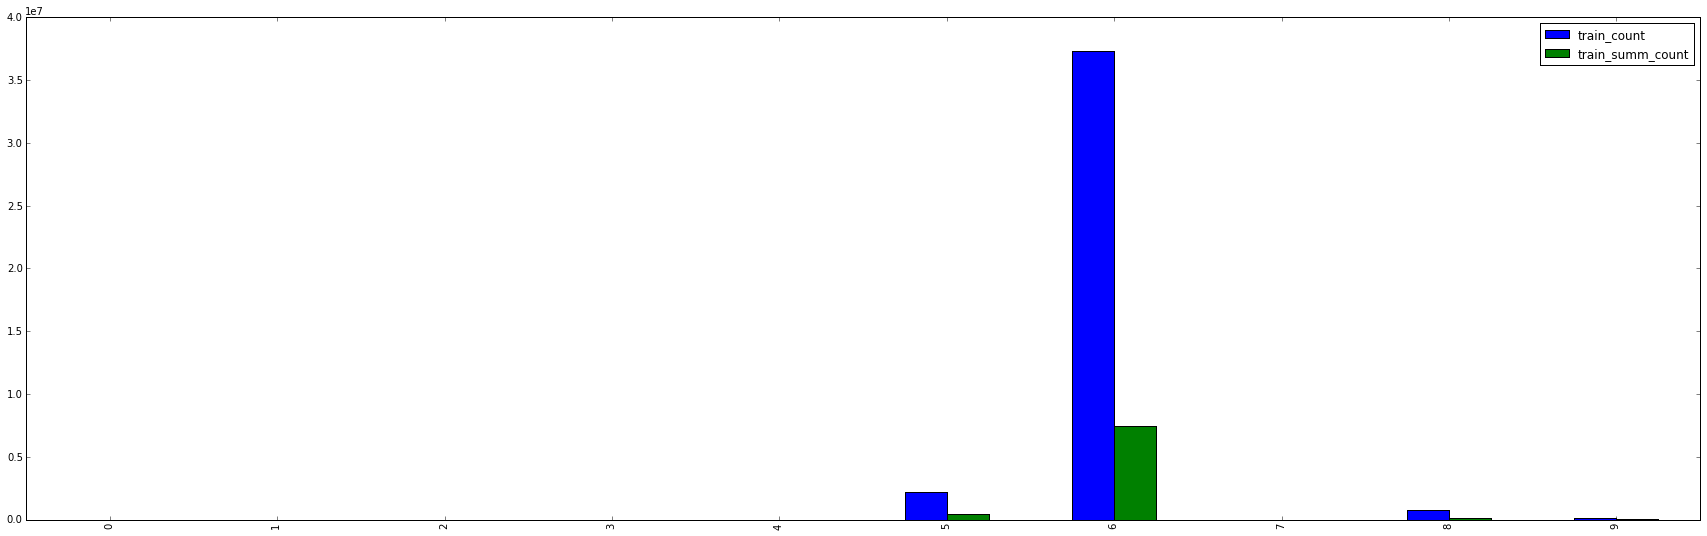

In [13]:
plot_counts('device_type')

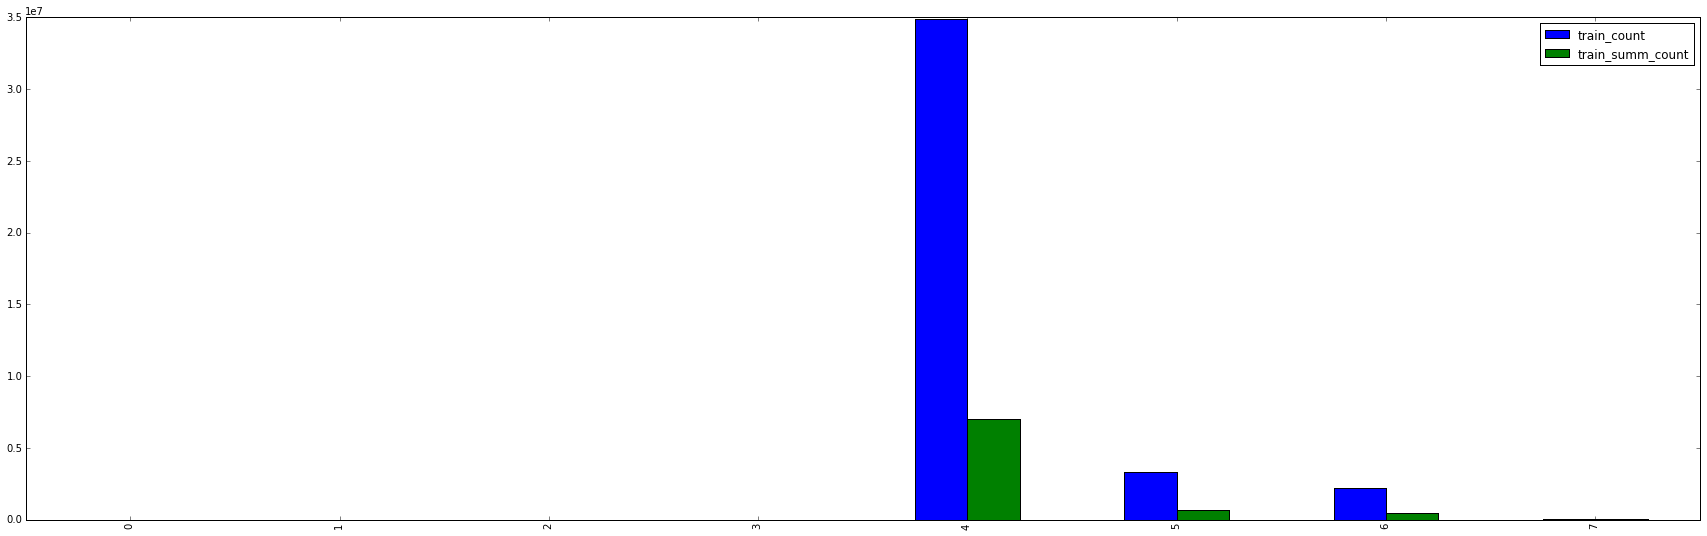

In [28]:
plot_counts('device_conn_type')

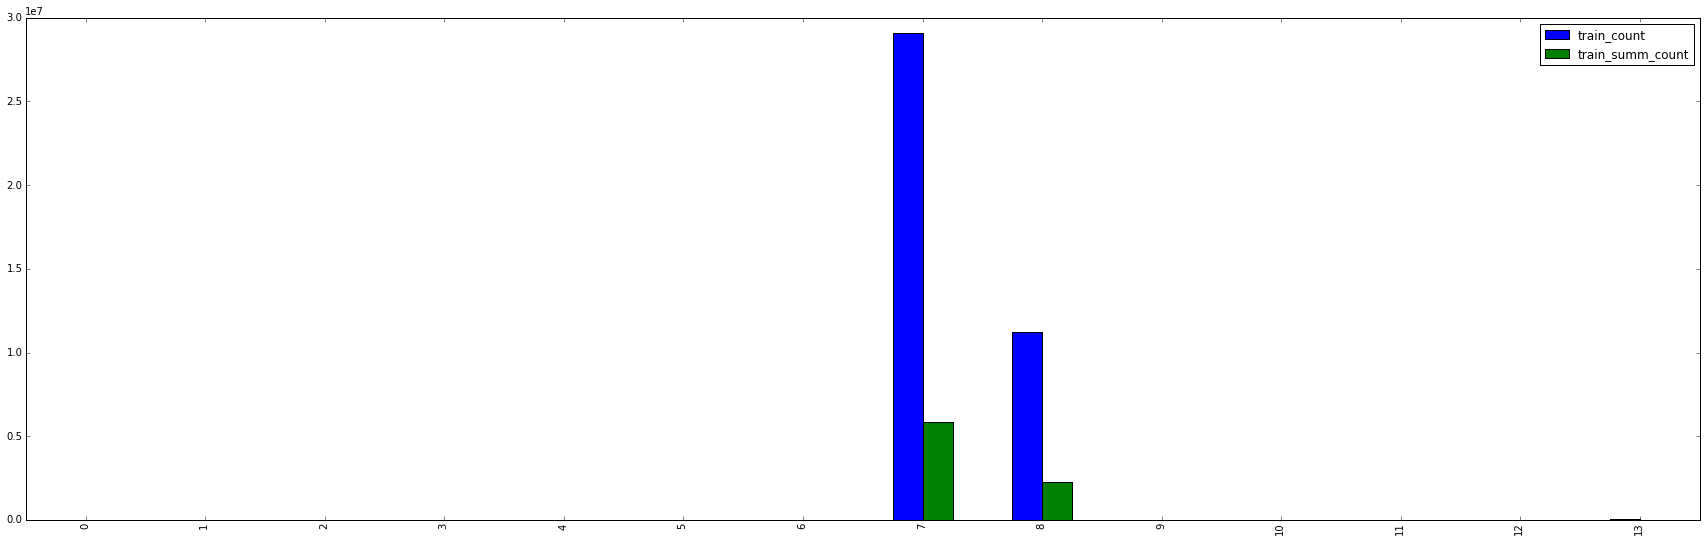

In [30]:
plot_counts('banner_pos')

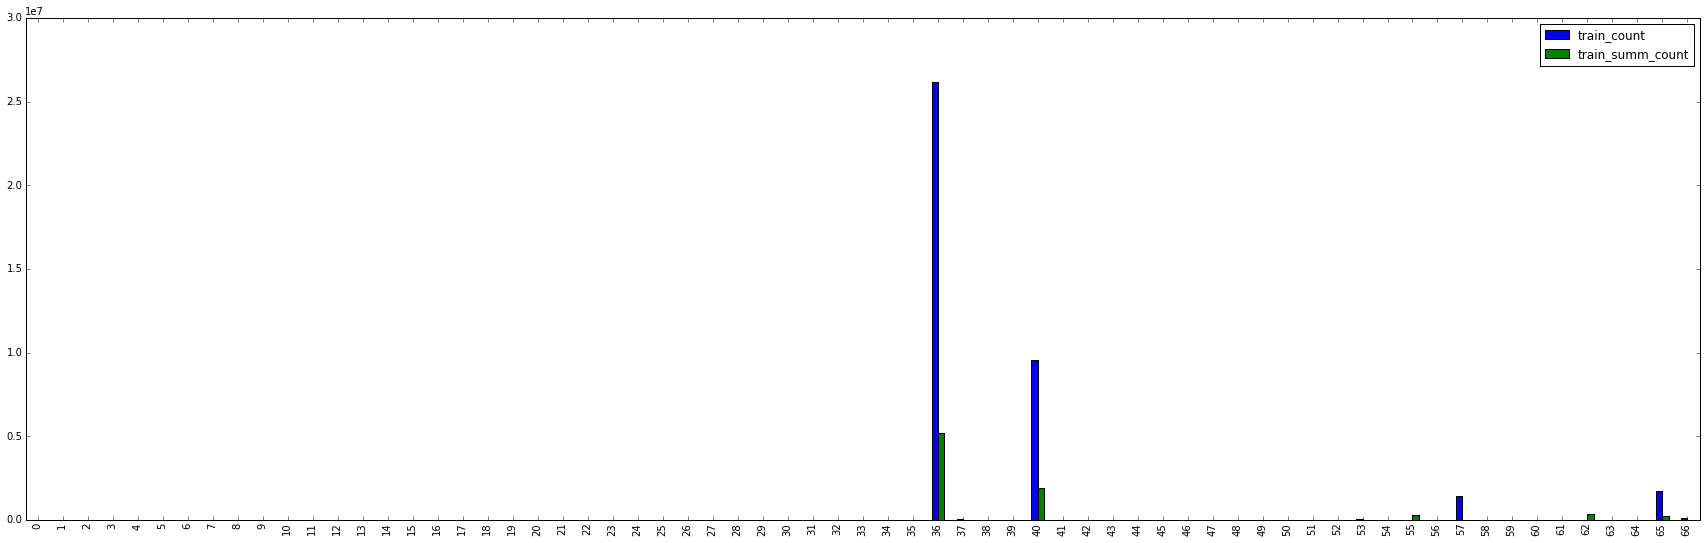

In [31]:
plot_counts('app_category')

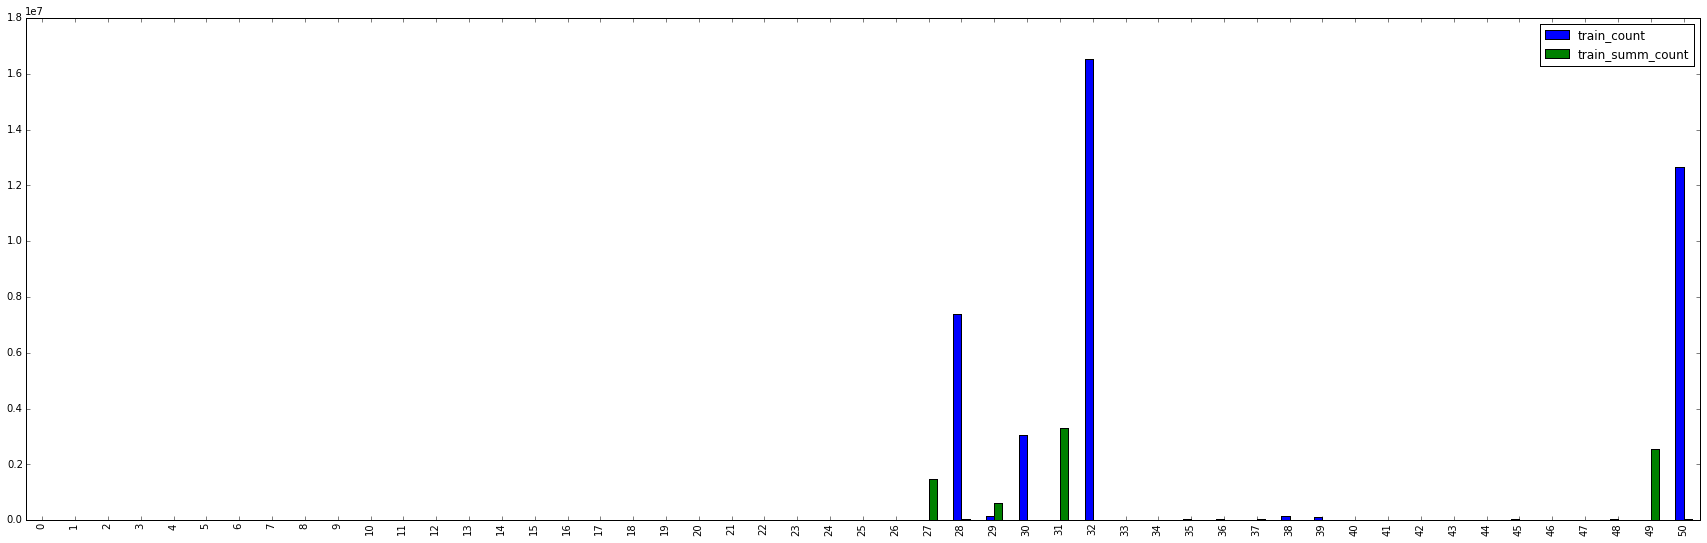

In [32]:
plot_counts('site_category')

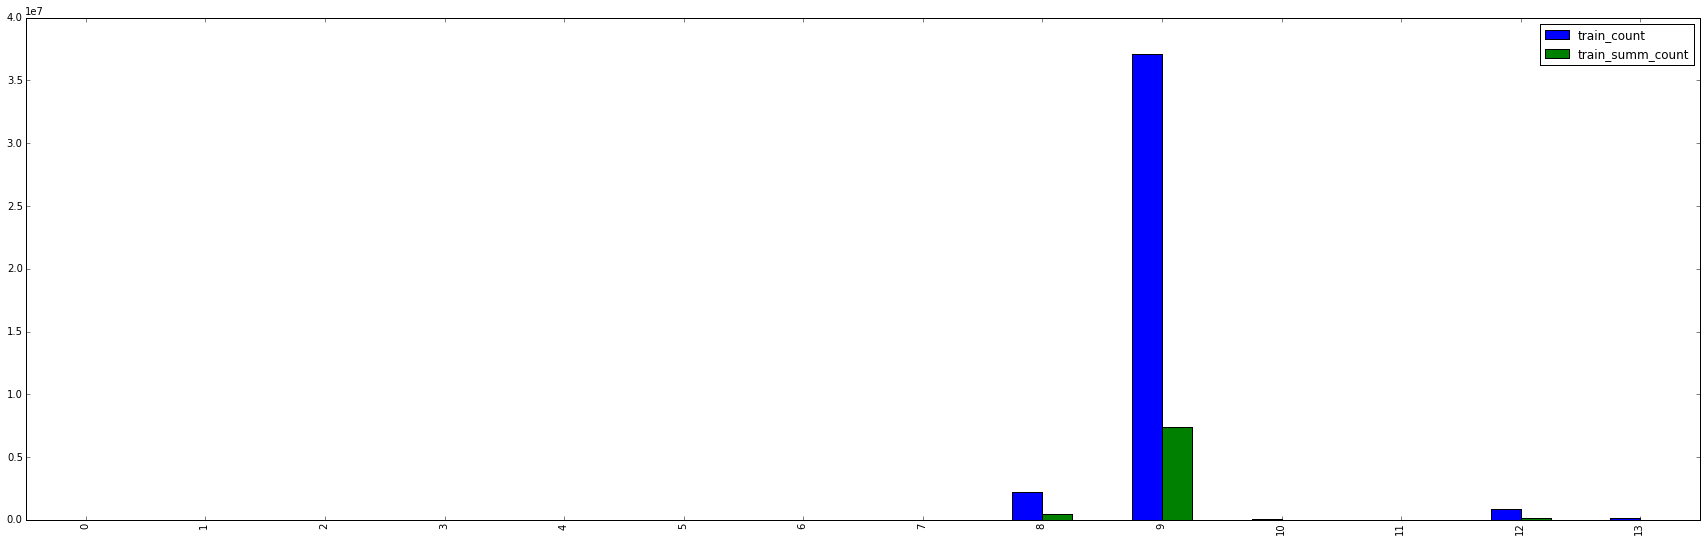

In [33]:
plot_counts('C1')

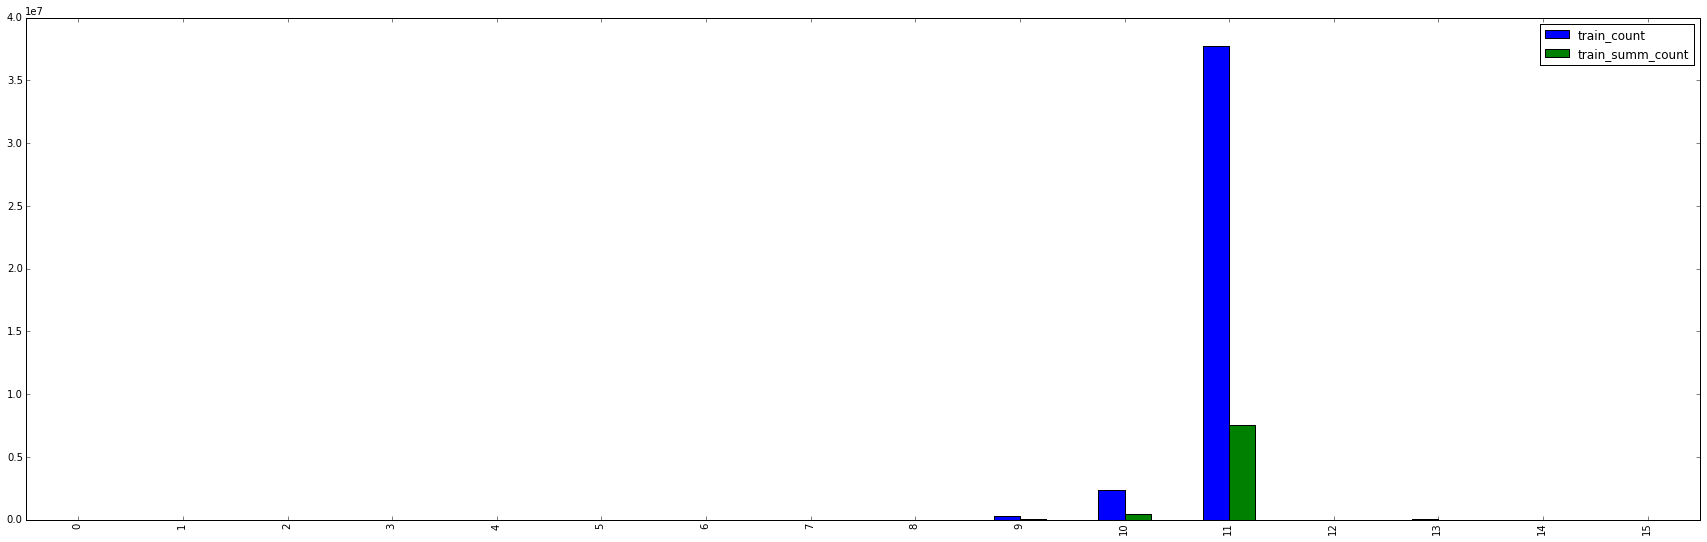

In [34]:
plot_counts('C15')

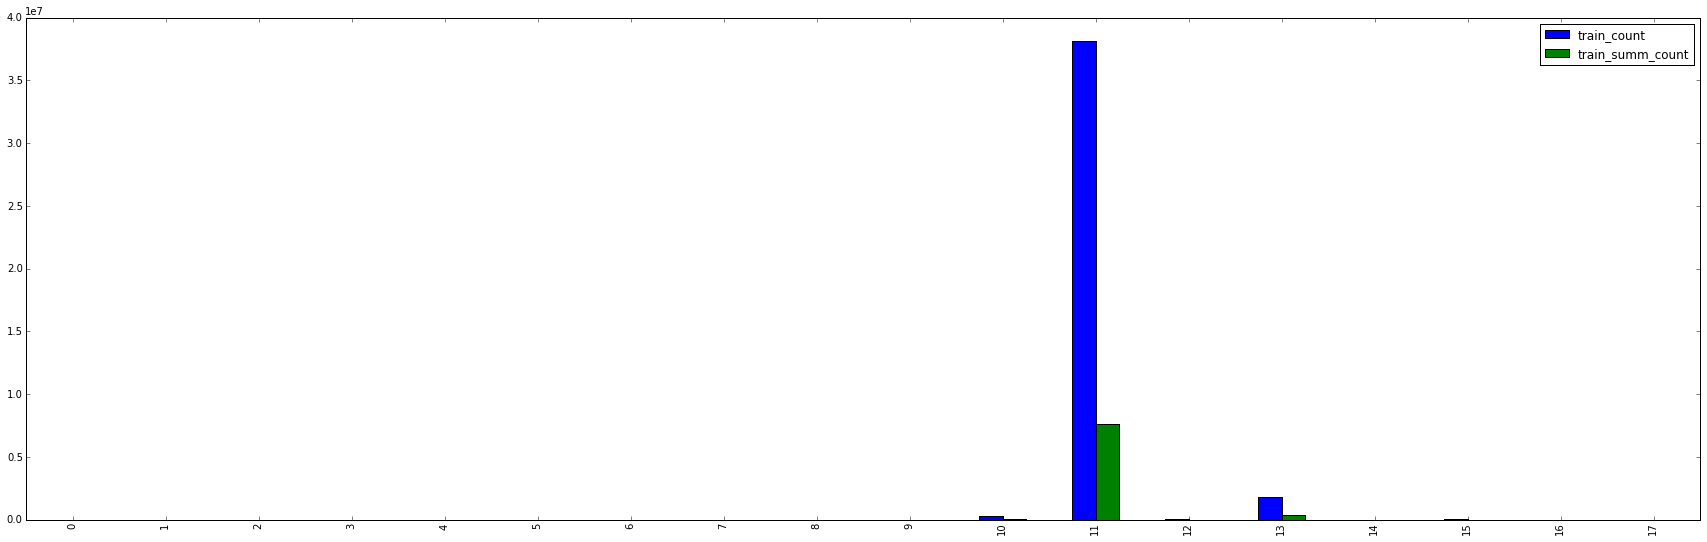

In [35]:
plot_counts('C16')

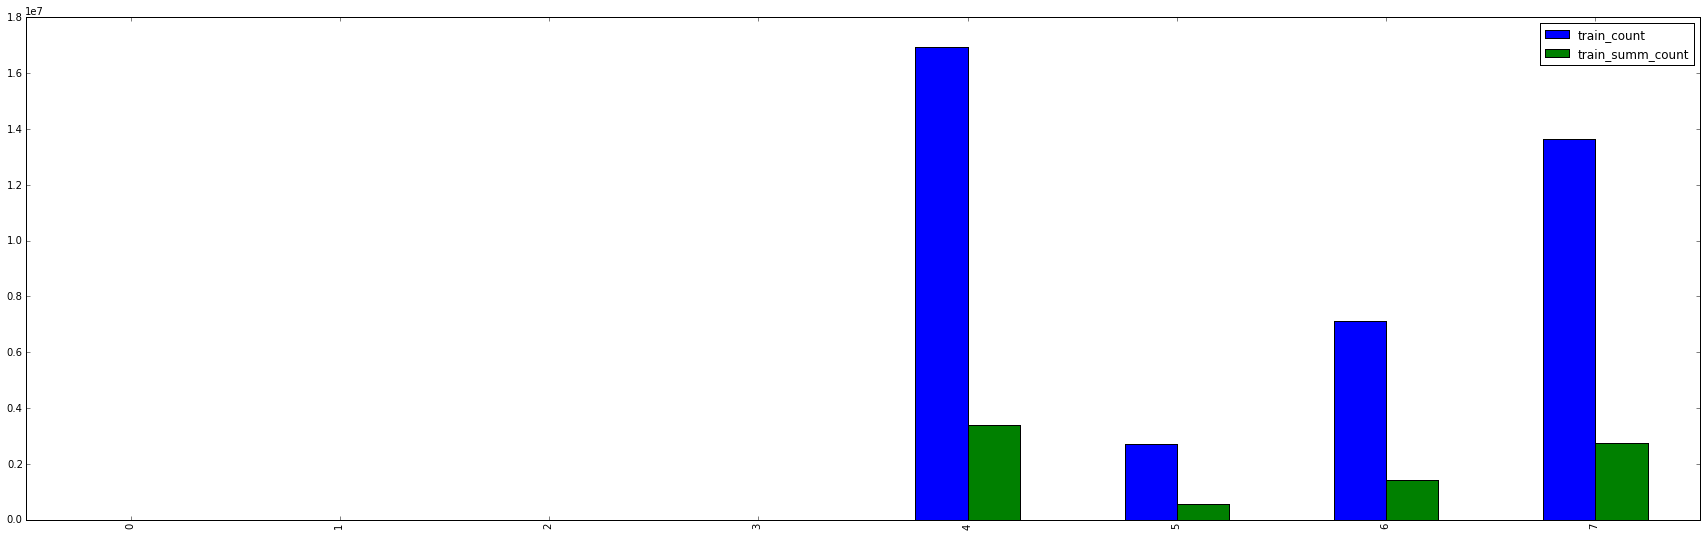

In [36]:
plot_counts('C18')

### Analysing the tables and plots obtained

The sampling retrieved was considered as representative for the following reasons:
* The count of the different levels, for each feature, seems to be preserved;
* The most frequent category, for each feature, continues to be the same;
* The list of unique values is a bit smaller, and the values that disappeared from the original version to the sampled version, are almost negligible, and maybe susceptible to be collapsed.